# Placement Prediction #

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dat=pd.read_csv("AmritaStudentsPlacemnt00.csv")
dat.head()

,Roll.no,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement,Sex,mass_recruiter
0,cseXXXX,8.2,0,0,3,1,5,2,1100000,male,yes
1,cseXXXX,7.2,3,3,1,1,1,0,450000,male,no
2,cseXXXX,2.3,14,2,0,0,0,0,0,male,no
3,cseXXXX,6.5,0,0,1,2,3,1,350000,male,yes
4,cseXXXX,9.5,0,0,1,1,1,1,1050000,female,yes


In [59]:
iin=dat.iloc[ : , : ]

iin.head()
iin.dtypes

Roll.no            object
CGPA              float64
tot_arriers         int64
clrd_arriers        int64
Interns             int64
Paid_intrn          int64
Projects            int64
Articels            int64
Placement           int64
Sex                object
mass_recruiter     object
dtype: object

In [60]:
dat.drop(columns=['Roll.no'])
dat.head()

,Roll.no,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement,Sex,mass_recruiter
0,cseXXXX,8.2,0,0,3,1,5,2,1100000,male,yes
1,cseXXXX,7.2,3,3,1,1,1,0,450000,male,no
2,cseXXXX,2.3,14,2,0,0,0,0,0,male,no
3,cseXXXX,6.5,0,0,1,2,3,1,350000,male,yes
4,cseXXXX,9.5,0,0,1,1,1,1,1050000,female,yes


In [61]:
x=dat.iloc[ : ,1:8]
df = pd.DataFrame(data=x)
df.astype('float64').dtypes
df.head()
df.dtypes

CGPA            float64
tot_arriers       int64
clrd_arriers      int64
Interns           int64
Paid_intrn        int64
Projects          int64
Articels          int64
dtype: object

In [62]:
y=dat.iloc[ : ,8:9]
y.head()


,Placement
0,1100000
1,450000
2,0
3,350000
4,1050000


In [63]:
dat.describe()

,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,6.593636,2.474747,0.878788,1.050505,0.808081,1.676768,0.757576,4.110000e+05
std,1.996298,3.737137,1.239427,1.172593,0.695125,1.640236,1.040907,3.662950e+05
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.150000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.400000e+05
50%,6.800000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.400000e+05
75%,8.200000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,5.650000e+05
max,9.800000,17.000000,5.000000,5.000000,2.000000,8.000000,4.000000,1.450000e+06


# Data visualization

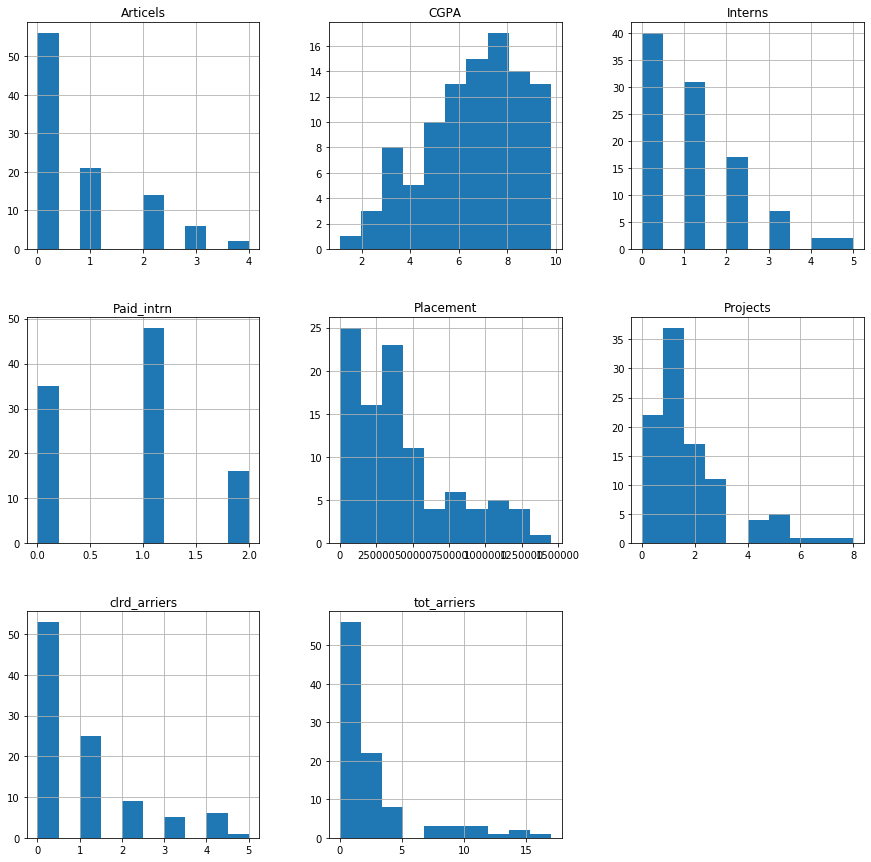

In [64]:
dv= dat.columns[dat.dtypes !='object']
dat[dv].hist(figsize=(15,15))
plt.show()

# Data preprocessing

In [65]:
#Checking for missing values
dat.isnull().sum()

Roll.no           0
CGPA              0
tot_arriers       0
clrd_arriers      0
Interns           0
Paid_intrn        0
Projects          0
Articels          0
Placement         0
Sex               0
mass_recruiter    0
dtype: int64

In [66]:
#Drop the missing values
dat.dropna(axis=0,inplace=True)

In [67]:
#Splitting the data
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=42,shuffle=True)


In [68]:
#Linear Regression 1

In [69]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(x_train,y_train)
pred=my_model.predict(x_test)
print("Score =",my_model.score(x_test, y_test))



Score = 0.892861118669924


In [70]:
#Linear Regression 2

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#Create an object to regressor
lr=LinearRegression()
#fitting the object to training data
lr.fit(x_train,y_train)
#predicting using testing data
y_predict=lr.predict(x_test)
#Calculating the r2_score
r=r2_score(y_test,y_predict)
m=mean_squared_error(y_test,y_predict)
print("r2_score for linear regression model is  ",r)
print("Root mean squared error for linear regression model is ",np.sqrt(m))

r2_score for linear regression model is   0.892861118669924
Root mean squared error for linear regression model is  138160.38380553105


In [72]:
print(y_test,"\n ",y_predict)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000 
  [[ 290038.62488812]
 [  70807.36614716]
 [ 456306.46664074]
 [ 252499.26015427]
 [ 477637.73190397]
 [ 226067.14443968]
 [ 205284.21809214]
 [1323431.24282239]
 [  18610.33790088]
 [ 848726.64624906]]


In [73]:
print(y_predict)

[[ 290038.62488812]
 [  70807.36614716]
 [ 456306.46664074]
 [ 252499.26015427]
 [ 477637.73190397]
 [ 226067.14443968]
 [ 205284.21809214]
 [1323431.24282239]
 [  18610.33790088]
 [ 848726.64624906]]


In [74]:
xp=[[4.1,7,0,0,0,2,0]]

In [75]:
ynew = lr.predict(xp)

In [76]:
print(ynew)

[[169942.7442756]]


In [77]:
#Pllynomial Regression

In [78]:
#KNN Neighbours

In [79]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(x_train,y_train)
y_pred2=kn.predict(x_test)
r=r2_score(y_test,y_pred2)
m=mean_squared_error(y_test,y_pred2)
print("r2_score for k-neighbors  regression model is  ",r)
print("Root mean squared error for k-neighbors regression model is ",np.sqrt(m))

r2_score for k-neighbors  regression model is   0.9401489638759795
Root mean squared error for k-neighbors regression model is  103263.25580766858


In [80]:
print(y_test)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000


In [81]:
print(y_pred2)

[[ 189000.]
 [      0.]
 [ 353000.]
 [ 442000.]
 [ 220000.]
 [ 223000.]
 [ 260000.]
 [1111000.]
 [  48000.]
 [ 965000.]]


In [82]:
xp=[[8.19,0,0,0,1,3,1]]
ynew = kn.predict(xp)
print(ynew)

[[585000.]]


In [83]:
#Desicion Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=13)
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
r=r2_score(y_test,y_pred1)
m=mean_squared_error(y_test,y_pred1)
print("r2_score for decision tree regression model is  ",r)
print("Root mean squared error for decision tree regression model is ",np.sqrt(m))

r2_score for decision tree regression model is   0.7266002110415123
Root mean squared error for decision tree regression model is  220703.42090688128


In [85]:
xp1=[[6.2,0,0,1,0,2,1]]
ynew1 = dt.predict(xp1)
print(ynew1)

[300000.]


In [86]:
print(y_test,"    ",y_pred1)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000      [ 120000.       0.  570000.  340000.  450000.  120000.  180000. 1290000.
       0.  560000.]


In [87]:
#xgbooost Regre
!pip install xgboost

In [88]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_p=model.predict(x_test)
r=r2_score(y_test,y_p)
m=mean_squared_error(y_test,y_p)
print("r2_score for xgboost regression model is  ",r)
print("Root mean squared error for xgboost regression model is ",np.sqrt(m))

r2_score for xgboost regression model is   0.8568605779021826
Root mean squared error for xgboost regression model is  159694.37059156323


In [89]:
print(y_test,"      ",y_p)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000        [ 1.6556777e+05 -3.3162030e+02  3.9527181e+05  3.8024897e+05
  3.5199869e+05  1.1909469e+05  1.8713138e+05  1.2900006e+06
 -8.5122330e+01  6.6031688e+05]


In [90]:
# Gradient Boost regressor

In [91]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)

print("Score =",clf.score(x_test,y_test))
pred=clf.predict(x_test)
m=mean_squared_error(y_test,pred)
print("Root mean squared error for xgboost regression model is ",np.sqrt(m))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score = 0.8596471837216663
Root mean squared error for xgboost regression model is  158132.28373552652


In [92]:
xp=[[6.2,0,0,1,0,2,1]]
ynew = clf.predict(xp)
print(ynew)

[324256.77678289]


In [93]:
print(y_test,"   ",pred)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000     [ 1.63424138e+05 -9.24036400e+01  3.52306320e+05  3.89505848e+05
  3.80083380e+05  1.18649400e+05  1.68282680e+05  1.28436729e+06
  1.12190203e+03  6.52992843e+05]


In [94]:
#lgbm Regressor
!pip install lightgbm

In [95]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(random_state=45)
lgbm.fit(x_train,y_train)
y_predict1=lgbm.predict(x_test)
r=r2_score(y_test,y_predict1)
m=mean_squared_error(y_test,y_predict1)
print("r2_score for LGBM regression model is  ",r)
print("Root mean squared error for LGBM regression model is ",np.sqrt(m))

r2_score for LGBM regression model is   0.8674666873045027
Root mean squared error for LGBM regression model is  153664.1308929334


In [96]:
xp=[[6.2,0,0,1,0,2,1]]
ynew = lgbm.predict(xp)
print(ynew)

[322453.48515901]


In [97]:
print(y_test,"      ",y_predict1)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000        [ 168501.00379309   41177.93070001  322692.12114052  295764.82518904
  317271.03339603  128255.09632459  150258.55508792 1045256.65304041
   24626.56194566  746390.72562966]


In [98]:
from sklearn import ensemble, model_selection 
RFC = ensemble.RandomForestClassifier( n_estimators = 100,max_depth = 8, min_samples_split = 4, n_jobs = -1, random_state = 1 )

#fitting in to dataset
RFC = RFC.fit(x_train, y_train)
#Score of the train dataset



y_predict1=RFC.predict(x_test)
r=r2_score(y_test,y_predict1)
m=mean_squared_error(y_test,y_predict1)
print("r2_score for LGBM regression model is  ",r)
print("Root mean squared error for LGBM regression model is ",np.sqrt(m))

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


r2_score for LGBM regression model is   0.8641139624166498
Root mean squared error for LGBM regression model is  155595.62975867928


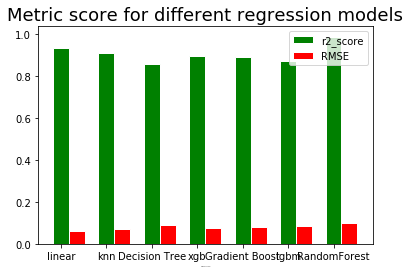

In [99]:
regressionmodels=['linear','knn','Decision Tree','xgb','Gradient Boost','lgbm','RandomForest']
errors=['r2_score','RMSE']
index = np.arange(len(regressionmodels))
bar_width=0.35
r=[0.9308,0.9104,0.85582,0.8967,0.8919,0.8718,0.987]
m=[0.0624,0.07098,0.09005,0.07622,0.07796,0.08492,0.09876]
plt.bar(index,r,bar_width,color='green',edgecolor='white')
plt.bar(index+bar_width,m,bar_width,color='red',edgecolor='white')
plt.xticks(index, regressionmodels)
plt.xlabel('regression models', fontsize=1)

plt.title('Metric score for different regression models',fontsize=18)
plt.legend(errors)
plt.show()

 So here the best model is linear Regression 

# HYPOTHESIS TESTING

# T Testing

In [141]:
dat.head()

,Roll.no,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement,Sex,mass_recruiter
0,cseXXXX,8.2,0,0,3,1,5,2,1100000,male,yes
1,cseXXXX,7.2,3,3,1,1,1,0,450000,male,no
2,cseXXXX,2.3,14,2,0,0,0,0,0,male,no
3,cseXXXX,6.5,0,0,1,2,3,1,350000,male,yes
4,cseXXXX,9.5,0,0,1,1,1,1,1050000,female,yes


In [142]:
place=dat["Placement"]
len(place)

99

In [143]:
import numpy as np
place_mean=np.mean(place)
print(place_mean)


411000.0


In [144]:
## Lets take sample

sample_size=20
place_sample=np.random.choice(place,sample_size)
place_sample

array([ 760000,       0,  200000,  120000,  380000,  970000,  800000,
        370000,  360000,  560000,  380000,       0,  450000,       0,
       1050000,  270000,  100000,       0,  460000,  450000], dtype=int64)

In [145]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(place_sample,411000.0)

In [146]:
print(p_value)

0.7093284077686068


In [147]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Paired T Test

In [148]:
import scipy.stats as stats
import math

In [149]:
#print(place)
place2=place+stats.norm.rvs(scale =100,loc=-1.25,size=99)


In [150]:
print(place)
print(place2)

0     1100000
1      450000
2           0
3      350000
4     1050000
       ...   
94     650000
95     200000
96     180000
97     300000
98     270000
Name: Placement, Length: 99, dtype: int64
0     1.100128e+06
1     4.499688e+05
2    -9.942210e+00
3     3.499173e+05
4     1.049895e+06
          ...     
94    6.500582e+05
95    1.999856e+05
96    1.799322e+05
97    3.000596e+05
98    2.700129e+05
Name: Placement, Length: 99, dtype: float64


In [151]:
placeF=pd.DataFrame({"initPlace":np.array(place),
                         "foundPlace":np.array(place2),
                       "Place_change":np.array(place2)-np.array(place)})

In [152]:
placeF

,initPlace,foundPlace,Place_change
0,1100000,1.100128e+06,127.555158
1,450000,4.499688e+05,-31.177005
2,0,-9.942210e+00,-9.942210
3,350000,3.499173e+05,-82.654768
4,1050000,1.049895e+06,-105.386364
...,...,...,...
94,650000,6.500582e+05,58.226318
95,200000,1.999856e+05,-14.357313
96,180000,1.799322e+05,-67.835569
97,300000,3.000596e+05,59.599786


In [153]:
_,p_value=stats.ttest_rel(a=place,b=place2)

In [154]:
print(p_value)

0.43746017413988303


In [155]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Chi-Square Test

In [157]:
dataset_table=pd.crosstab(dat['Sex'],dat['mass_recruiter'])
print(dataset_table)

mass_recruiter  no  yes
Sex                    
female          36   11
female           3    0
male            18   30
male             1    0


In [158]:
dataset_table.values

array([[36, 11],
       [ 3,  0],
       [18, 30],
       [ 1,  0]], dtype=int64)

In [159]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[36 11]
 [ 3  0]
 [18 30]
 [ 1  0]]


In [160]:

val=stats.chi2_contingency(dataset_table)

In [161]:
val

(17.906691211996492,
 0.00045977568021007506,
 3,
 array([[27.53535354, 19.46464646],
        [ 1.75757576,  1.24242424],
        [28.12121212, 19.87878788],
        [ 0.58585859,  0.41414141]]))

In [162]:
Expected_Values=val[3]

In [163]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [164]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [165]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 17.906691211996492


In [166]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [167]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 2.32003988999141e-05
Significance level:  0.05
Degree of Freedom:  1
p-value: 2.32003988999141e-05


In [170]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    


Reject H0,There is a relationship between 2 categorical variables


In [169]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


# Correlation

In [172]:
dat.corr()

,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement
CGPA,1.000000,-0.855397,-0.691718,0.533654,0.239860,0.508915,0.597953,0.873205
tot_arriers,-0.855397,1.000000,0.776991,-0.378097,-0.208105,-0.350926,-0.392439,-0.606545
clrd_arriers,-0.691718,0.776991,1.000000,-0.269568,-0.086495,-0.280475,-0.315655,-0.563882
Interns,0.533654,-0.378097,-0.269568,1.000000,0.237352,0.655837,0.612065,0.613079
Paid_intrn,0.239860,-0.208105,-0.086495,0.237352,1.000000,0.392518,0.358120,0.296479
Projects,0.508915,-0.350926,-0.280475,0.655837,0.392518,1.000000,0.587158,0.694861
Articels,0.597953,-0.392439,-0.315655,0.612065,0.358120,0.587158,1.000000,0.739054
Placement,0.873205,-0.606545,-0.563882,0.613079,0.296479,0.694861,0.739054,1.000000


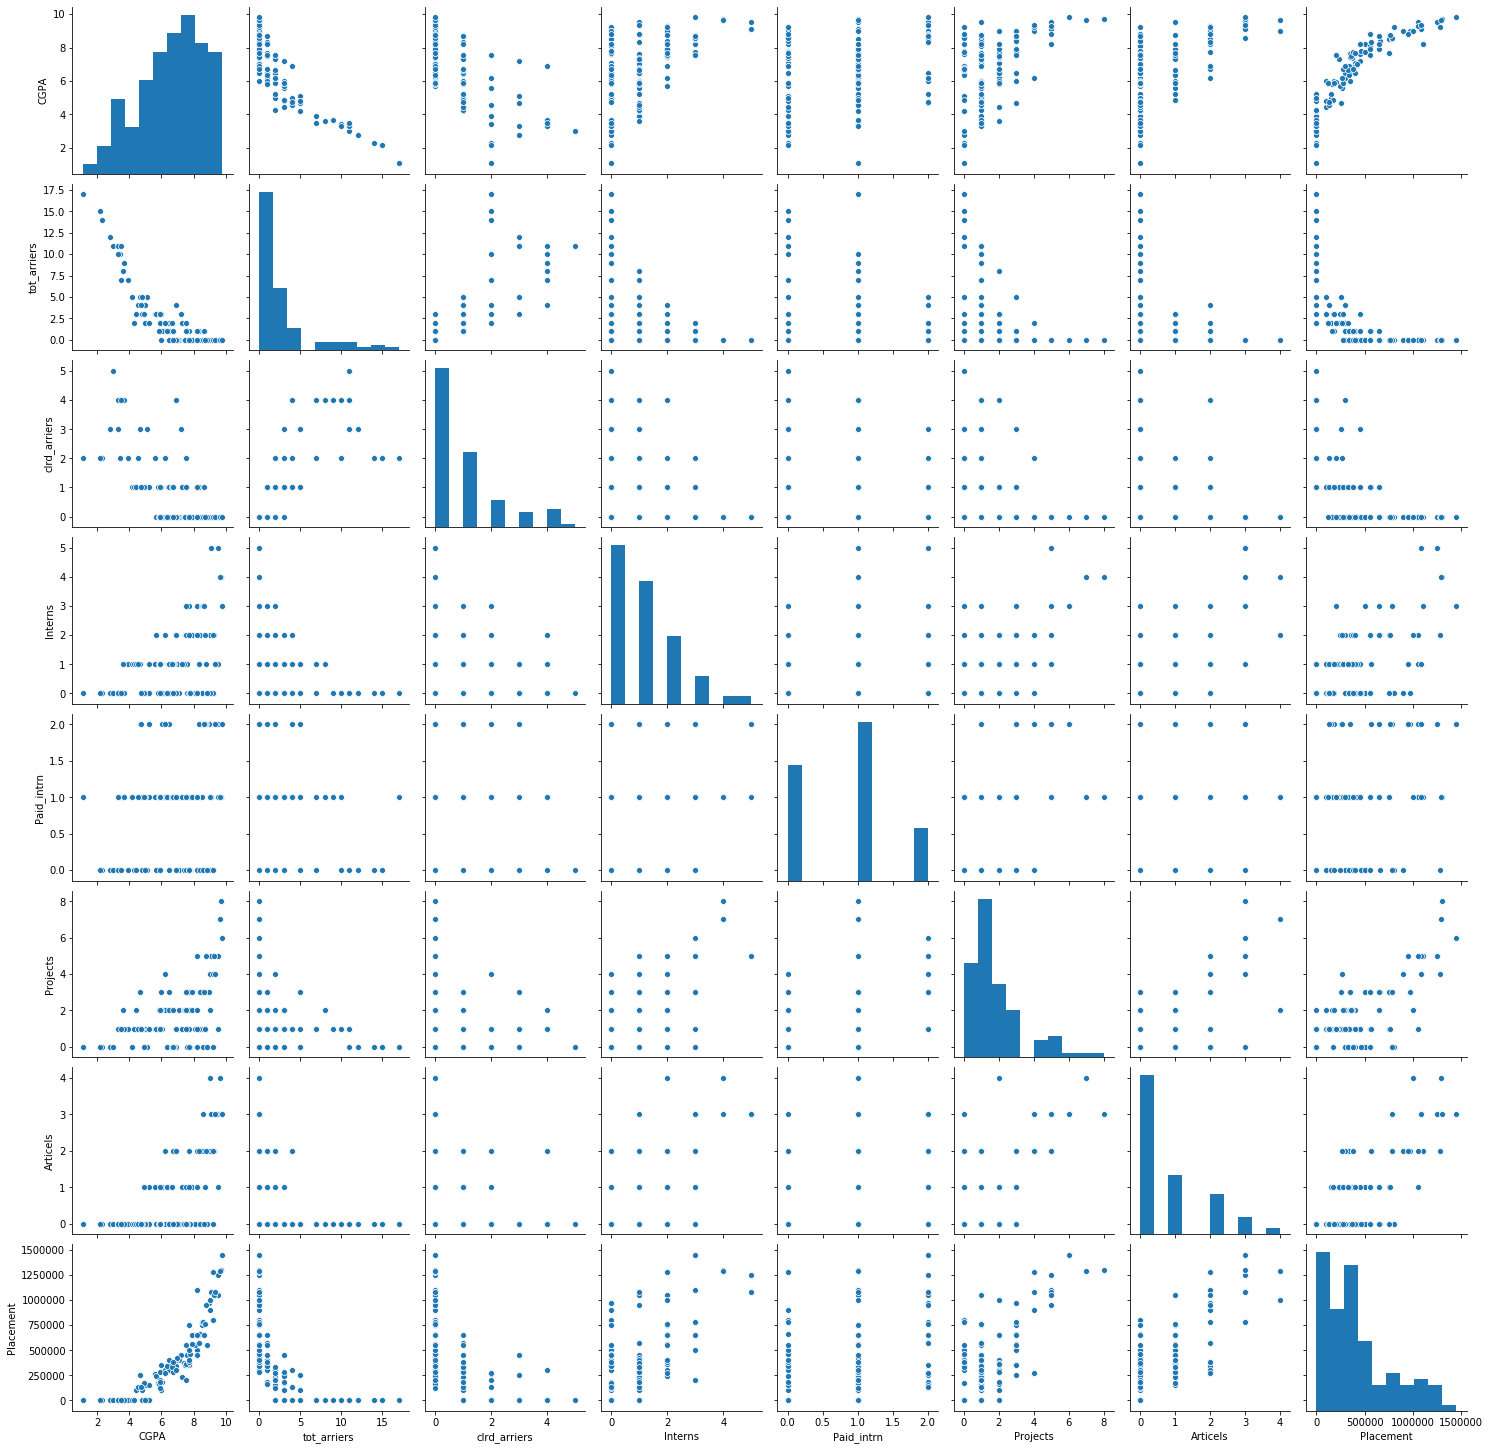

In [174]:
sns.pairplot(dat)